In [3]:
import csv
import networkx as nx
from operator import itemgetter
from networkx.algorithms import community
from pprint import pprint

In [2]:
import pandas as pd
a=pd.read_table("AROs_file.csv", sep=",")

In [3]:
a

,Unnamed: 0,Genome_Bin,AROs
0,0,GMBC10.059_230,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
1,1,GMBC10.065_422,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
2,2,GMBC10.069_549,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
3,3,GMBC10.077_233,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
4,4,GMBC10.086_415,"ARO:1000001,ARO:3000000,ARO:3000012,ARO:300049..."
...,...,...,...
22884,22884,GMBC10.120_065,"ARO:1000001,ARO:3000000,ARO:3000164,ARO:300051..."
22885,22885,GMBC10.125_139,"ARO:1000001,ARO:3000000,ARO:3000164,ARO:300051..."
22886,22886,GMBC10.129_243,"ARO:1000001,ARO:3000000,ARO:3000164,ARO:300051..."
22887,22887,GMBC10.199_741,"ARO:1000001,ARO:3000000,ARO:3000164,ARO:300051..."


In [4]:
a.to_csv("final_file.csv")

In [12]:
with open('AROs_file.csv', 'r') as nodecsv: 
    nodereader = csv.reader(nodecsv) 
    nodes = [n[1] for n in nodereader][1:]

node_names = [n[0] for n in nodes] 

with open('AROs_file.csv', 'r') as edgecsv: 
    edgereader = csv.reader(edgecsv) 
    edges = [set(e[2].split(',')) for e in edgereader][1:]
    #edges = [e for n in edgereader][1:]

pprint(nodes[0:10])
pprint(edges[0:10])

['GMBC10.059_230',
 'GMBC10.065_422',
 'GMBC10.069_549',
 'GMBC10.077_233',
 'GMBC10.086_415',
 'GMBC10.100_306',
 'GMBC10.113_359',
 'GMBC10.125_231',
 'GMBC10.128_202',
 'GMBC10.129_494']
[{'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO:3003728'},
 {'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO:3003728'},
 {'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO:3003728'},
 {'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO:3003728'},
 {'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO:3003728'},
 {'ARO:1000001',
  'ARO:3000000',
  'ARO:3000012',
  'ARO:3000494',
  'ARO:3000574',
  'ARO:3002905',
  'ARO:3002976',
  'ARO

In [6]:
df = pd.read_csv('AROs_file.csv', index_col=0, nrows=100)
df['AROs'] = df['AROs'].str.split(',')
df = df.set_index('Genome_Bin')
df

,AROs
Genome_Bin,
GMBC10.059_230,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.065_422,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.069_549,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.077_233,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.086_415,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
...,...
GMBC10.062_981,"[ARO:1000001, ARO:3000000, ARO:3000006, ARO:30..."
GMBC10.064_830,"[ARO:1000001, ARO:3000000, ARO:3000006, ARO:30..."
GMBC10.064_909,"[ARO:1000001, ARO:3000000, ARO:3000006, ARO:30..."


In [7]:
adj_m = pd.DataFrame(index=df.index, columns=df.index)
for genome_bin_i, aros_i in df.iterrows():
    for genome_bin_j, aros_j in df.iterrows():
        aros_i = aros_i[0]
        aros_j = aros_j[0]
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        adj_m.loc[genome_bin_i, genome_bin_j] = len(set(aros_i).intersection(set(aros_j)))
adj_m

Genome_Bin,GMBC10.059_230,GMBC10.065_422,GMBC10.069_549,GMBC10.077_233,GMBC10.086_415,GMBC10.100_306,GMBC10.113_359,GMBC10.125_231,GMBC10.128_202,GMBC10.129_494,...,GMBC10.061_008,GMBC10.061_218,GMBC10.061_612,GMBC10.062_267,GMBC10.062_700,GMBC10.062_981,GMBC10.064_830,GMBC10.064_909,GMBC10.064_933,GMBC10.066_778
Genome_Bin,,,,,,,,,,,,,,,,,,,,,
GMBC10.059_230,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.065_422,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.069_549,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.077_233,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.086_415,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GMBC10.062_981,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.064_830,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMBC10.064_909,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
!python -m pip install -U decorator

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


Network density: 1.02020202020202


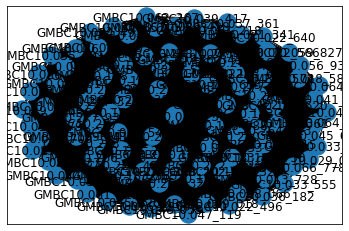

In [8]:
G = nx.Graph()
for genome_bin_i, aros_i in df.iterrows():
    for genome_bin_j, aros_j in df.iterrows():
        aros_i = aros_i[0]
        aros_j = aros_j[0]
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        num_overlap_aros = len(set(aros_i).intersection(set(aros_j)))
        G.add_edge(genome_bin_i, genome_bin_j, weight=num_overlap_aros)
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)

In [2]:
num_overlap_aros 

NameError: name 'num_overlap_aros' is not defined

In [13]:
print(len(node_names))

22889


In [14]:
print(len(edges))

22889


In [15]:
G = nx.Graph()

In [7]:
G.add_nodes_from(nodes)

In [ ]:
# process to get num_overlap_AROs

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 22889
Number of edges: 0
Average degree:   0.0000


In [20]:
bins = {}
ARO = {}

In [21]:
for node in nodes: 
    bins[node[0]] = node[1]
    ARO[node[0]] = node[2]

In [22]:
nx.set_node_attributes(G, bins, 'x')
nx.set_node_attributes(G, ARO, 'y')